low & high  0 1
Pbary :  [2.5 0.5]
low & high  1 0
Pbary :  [2.25 1.25]
low & high  1 2
Pbary :  [2. 2.]
low & high  1 0
Pbary :  [1.25 2.25]
low & high  1 0
Pbary :  [1.25 2.25]
low & high  0 2
Pbary :  [1.0625 1.8125]
low & high  0 1
Pbary :  [0.828125 2.265625]
low & high  1 2
Pbary :  [0.89453125 2.00390625]
low & high  1 0
Pbary :  [1.06347656 2.04394531]
low & high  0 2
Pbary :  [1.00415039 1.98364258]
low & high  2 1
Pbary :  [0.91387939 2.0894165 ]
low & high  1 0
Pbary :  [1.01124573 2.04023743]
low & high  1 2
Pbary :  [0.98335648 2.02423477]
low & high  1 0
Pbary :  [1.0110817  1.97011185]
low & high  0 2
Pbary :  [1.0041914  2.00117397]
low & high  2 1
Pbary :  [0.98155189 1.99693751]
low & high  1 0
Pbary :  [1.00197667 1.9845838 ]
low & high  1 2
Pbary :  [0.99797784 1.99596731]
low & high  1 2
Pbary :  [0.99797784 1.99596731]
low & high  2 0
Pbary :  [1.00519111 1.99832809]
low & high  0 1
Pbary :  [0.99778174 2.00224927]
low & high  0 2
Pbary :  [0.99973213 1.998128  ]


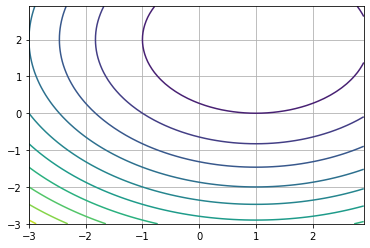

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy import optimize

def f(x):
    return (x[0] - 1)**2 + (x[1] - 2)**2

#jac is a callable returning the gradient of the objective
def Gf(x):
    return 2*(x[0] - 1), 2*(x[1] - 2)

def simplex(P):
    NPT=P.shape[0]

    alpha=1
    beta =0.5
    gamma=2
    eps=1e-6
    niter=0
    while True:
        niter=niter+1
        fp=np.zeros(shape=(NPT))
        for npt in range(NPT):
            fp[npt]=f(P[npt, :])  
  
        high=fp.argmax()
        low =fp.argmin()

        print('low & high ', low, high)

        mask = np.ones(fp.shape[0], dtype=bool)
        mask[high] = False
        fq=fp[mask]
        Q =P [mask]
        Pbary=Q.mean(axis=0)
        print('Pbary : ', Pbary)
        d=np.sum((P-Pbary)**2)
        if d<eps:
            return Pbary, niter

        Phigh=P[high, :]
        Yhigh=f(Phigh)
        Plow =P[low, :]
        Ylow=f(Plow)

        Prefl=(1+alpha)*Pbary-alpha*Phigh
        Yrefl=f(Prefl)
        if Yrefl>Ylow and Yrefl<Yhigh:
            P[high, :]=Prefl
        elif Yrefl<Ylow:
            Pexpa=(1+gamma)*Pbary-gamma*Phigh
            Yexpa=f(Pexpa)
            if Yexpa<Ylow:
                P[high, :]=Pexpa
            else:
                P[high, :]=Prefl
        else:
            Pcont=(1-beta)*Pbary+beta*Phigh
            Ycont=f(Pcont)
            if Ycont>Yhigh:
                mask = np.ones(fp.shape[0], dtype=bool)
                mask[low] = False
                P[mask] = 0.5*(P[mask] +Plow) # npt != low

#                for npt in range(NPT):
#                    if npt!=low: 
#                        P[npt, :]=0.5*(P[npt, :]+Plow)
            else:
                P[high, :]=Pcont
            

    
#cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
#        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
#        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})

P=np.array([[2, 0], [3, 0], [3, 1]], dtype='float')
Pbary, niter=simplex(P)
print('res =', Pbary)
print(niter)

delta =0.1
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z=(X-1)**2+(Y-2)**2

plt.figure()
CS = plt.contour(X, Y, Z, 11)                        # add 11 contour lines  
plt.grid()

res = optimize.minimize(fun=f, x0=(2, 0), method='Nelder-Mead', tol=1e-6)
print(res)
 
#res = optimize.minimize(f, (2, 0), method='CG')
#print(res)

plt.show()

In [13]:
help(optimize.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    In general, the optimization problems are of the form::
    
        minimize f(x) subject to
    
        g_i(x) >= 0,  i = 1,...,m
        h_j(x)  = 0,  j = 1,...,p
    
    where x is a vector of one or more variables.
    ``g_i(x)`` are the inequality constraints.
    ``h_j(x)`` are the equality constrains.
    
    Optionally, the lower and upper bounds for each element in x can also be specified 
    using the `bounds` argument.
    
    Parameters
    ----------
    fun : callable
        Objective function.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (Jacobian, Hessian).
    method : str or callable, o

In [35]:
M=[1, 2]
print(P+M)

[[ 2.00036083  3.99983884]
 [ 1.99998239  3.99913022]
 [ 1.99959711  3.99966879]]
